In [1]:
import numpy as np

In [2]:
def softmax(a):
    e_pa = np.exp(a)
    ans = e_pa/np.sum(e_pa,axis = 1, keepdims = True)
    return ans

In [3]:
# 3 Layer Network
class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        model = {}
        model['W1'] = np.random.randn(input_size, layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        model['W2'] = np.random.randn(layers[0], layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        
    def forward(self,x):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1) # squeezes output between -1 and 1
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        a2 = self.activation_outputs[1]
        a1 = self.activation_outputs[0]
        y_ = self.activation_outputs[2]
        m = x.shape[0]
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis = 0)/float(m)
        
        delta2 = (1-np.square(a2))*(np.dot(delta3,W3.T))
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis = 0)/float(m)
        
        delta1 = (1-np.square(a1))*(np.dot(delta2,W2.T))
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis = 0)/float(m)
        
        self.model["W1"] -= learning_rate*dw1
        self.model["b1"] -= learning_rate*db1
        
        self.model["W2"] -= learning_rate*dw2
        self.model["b2"] -= learning_rate*db2
        
        self.model["W3"] -= learning_rate*dw3
        self.model["b3"] -= learning_rate*db3
        
    def predict(self,x):
        y_out =  self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        print("W1",W1.shape)
        print("A1",a1.shape)
        
        print("W2",W2.shape)
        print("A2",a2.shape)
        
        print("W3",W3.shape)
        print("Y_",y_.shape)
        

In [4]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

In [5]:
def one_hot(y, depth):
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    
    return y_oht

In [6]:
def train(X,Y,model,epochs = 5000,learning_rate=0.01,logs = True):
    training_loss = []
    
    classes = 3
    Y_OHT = one_hot(Y,classes)
    cnt=0
    for ix in range(epochs):
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        training_loss.append(l)
        model.backward(X,Y_OHT,learning_rate)
        cnt+=1
        if(logs and cnt%50==1):
            print("Epoch %d Loss %.4f"%(ix,l))
            
    return training_loss

In [7]:
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [8]:
p = Path("Datasets/mypokemons/")
dirs = p.glob("*")

image_data = []
labels = []

image_paths = []

labels_dict = {"Pikachu":0,"Bulbasaur":1,"Meowth":2}
label2pokemon = {0:"Pikachu",1:"Bulbasaur",2:"Meowth"}

for folder_dir in dirs:
    label = str(folder_dir).split("/")[-1]
    cnt = 0
    print(folder_dir)
    
    for img_path in folder_dir.glob("*.jpg"):
        img = image.load_img(img_path,target_size=(60,60))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])
        cnt+=1
    print(cnt)

Datasets/mypokemons/Bulbasaur
174
Datasets/mypokemons/Meowth
70
Datasets/mypokemons/Pikachu
199


In [9]:
import random 
random.seed(10)

In [10]:
X = np.array(image_data)
Y = np.array(labels)

from sklearn.utils import shuffle
X,Y = shuffle(X,Y,random_state=2)

X = X/255.0

In [11]:
print(Y)

[2 0 1 1 0 1 0 1 2 1 0 2 0 0 1 0 0 2 0 0 0 2 0 1 0 1 1 0 1 1 0 2 1 0 0 0 2
 0 1 1 0 0 0 1 1 1 0 0 2 0 0 2 1 0 0 0 0 1 1 1 0 1 2 1 1 1 2 0 1 1 0 0 1 2
 1 2 1 0 0 2 0 0 0 0 1 0 0 1 2 1 1 1 0 0 1 0 1 2 1 2 1 2 1 0 1 1 0 0 2 0 0
 0 0 1 0 0 1 2 1 1 0 0 2 1 0 0 0 0 0 0 0 2 1 2 0 0 1 1 0 2 0 0 0 0 2 0 2 1
 1 0 1 0 0 1 2 1 0 0 1 0 1 2 0 1 0 1 2 0 0 1 0 2 1 1 0 0 0 1 1 0 0 1 1 1 0
 2 2 2 0 1 1 2 1 0 1 0 0 0 1 2 1 1 0 0 2 1 2 0 2 1 2 2 1 1 0 2 0 0 1 1 0 1
 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 2 0 2 1 2 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1
 0 1 1 1 2 1 2 1 0 1 0 1 0 0 2 2 0 0 2 0 1 1 0 0 0 1 1 1 1 0 0 0 2 0 1 0 0
 1 1 0 0 0 2 2 1 0 0 0 0 0 1 1 0 0 0 0 2 0 0 1 2 0 1 0 1 0 1 0 1 1 1 0 0 2
 2 1 2 0 0 0 1 1 0 1 2 0 2 0 1 1 0 1 2 0 2 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0
 1 0 1 0 1 1 0 1 1 1 0 0 0 2 1 0 0 0 2 0 1 0 1 2 0 0 1 1 2 1 1 1 1 2 0 0 2
 1 0 0 0 0 1 1 1 0 1 0 0 1 2 1 0 1 1 0 2 0 0 1 2 0 1 0 1 0 0 1 0 1 1 1 1]


In [12]:
def drawimg(img,labels):
    plt.title(label2pokemon[labels])
    plt.imshow(img)
    plt.style.use("seaborn")
    plt.axis("off")
    plt.show()

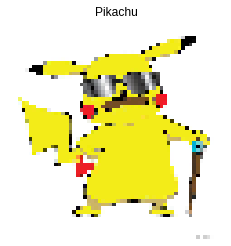

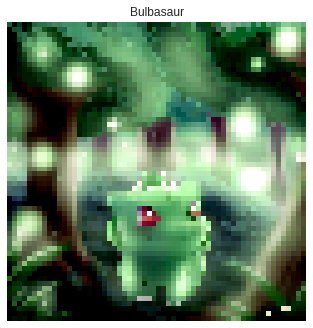

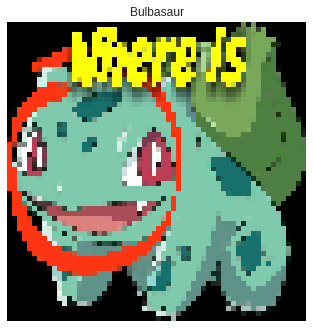

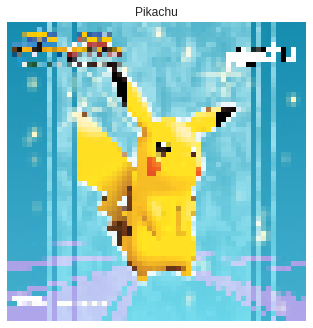

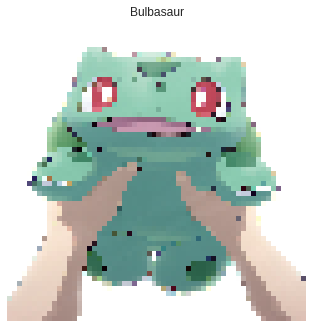

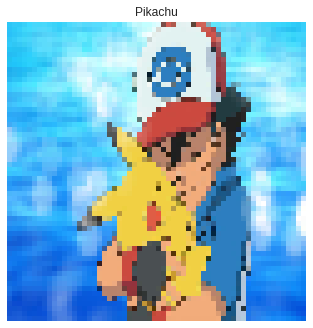

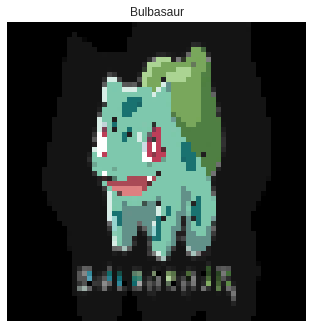

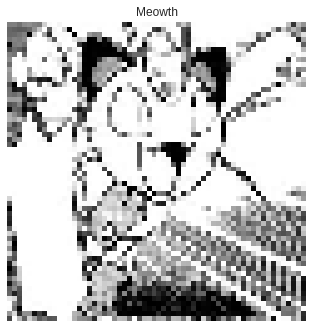

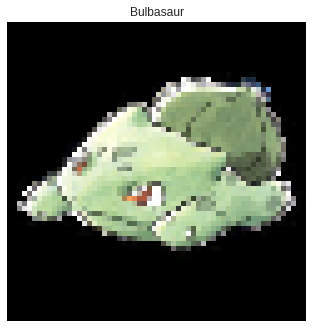

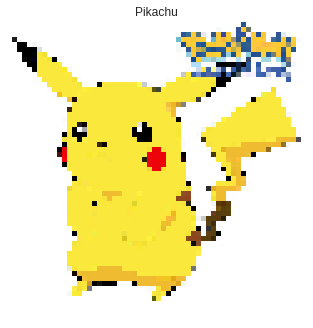

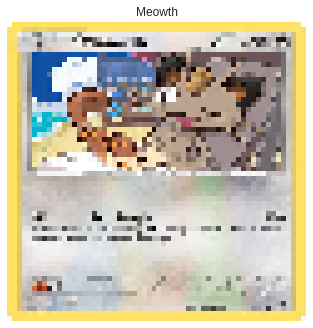

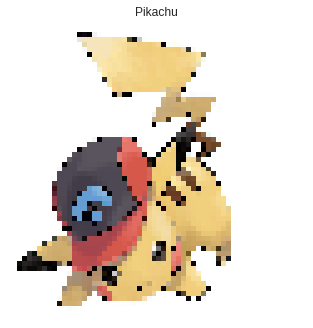

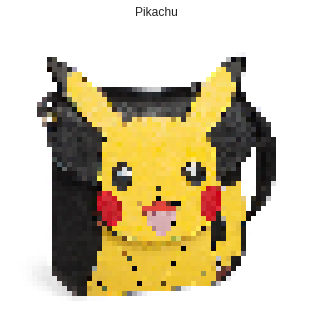

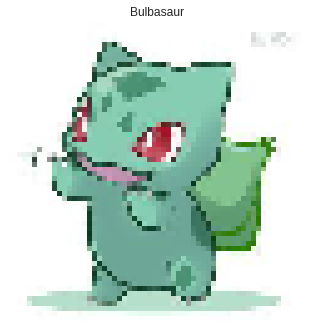

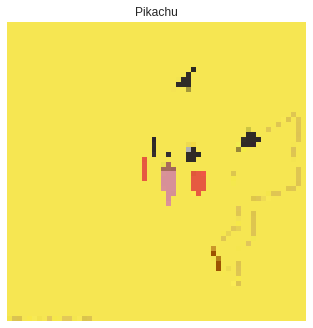

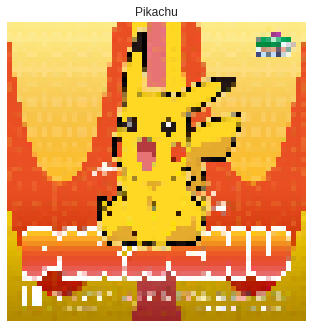

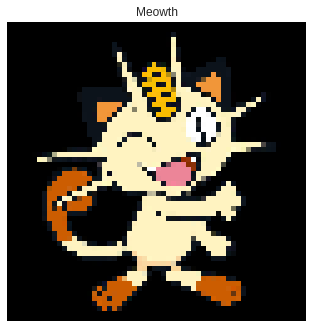

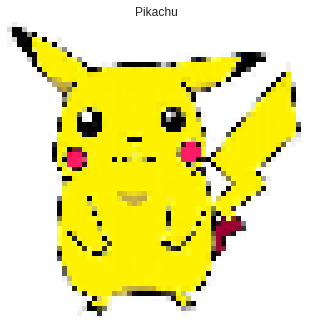

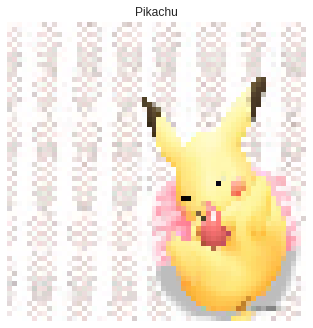

In [13]:
for i in range(1,20):
    drawimg(X[i].reshape(60,60,3),Y[i])

In [14]:
split = int(X.shape[0]*0.8)

X_ = np.array(X)
Y_ = np.array(Y)

X = X_[:split,:]
Y = Y_[:split]

XTest = X_[split:,:]
YTest = Y_[split:]

print(X.shape,Y.shape)
print(X_.shape,Y_.shape)
print(XTest.shape,YTest.shape)

(354, 60, 60, 3) (354,)
(443, 60, 60, 3) (443,)
(89, 60, 60, 3) (89,)


In [15]:
model = NeuralNetwork(input_size=10800,layers=[100,50],output_size=3)

In [16]:
print(X.shape)

(354, 60, 60, 3)


In [17]:
X = X.reshape(X.shape[0],-1)
print(X.shape)

XTest = XTest.reshape(XTest.shape[0],-1)
print(XTest.shape)

(354, 10800)
(89, 10800)


In [18]:
l = train(X,Y,model,600,0.0005)

Epoch 0 Loss 1.6430
Epoch 50 Loss 0.1767
Epoch 100 Loss 0.1093
Epoch 150 Loss 0.1073
Epoch 200 Loss 0.0700
Epoch 250 Loss 0.0416
Epoch 300 Loss 0.0358
Epoch 350 Loss 0.0288
Epoch 400 Loss 0.0253
Epoch 450 Loss 0.0226
Epoch 500 Loss 0.0205
Epoch 550 Loss 0.0189


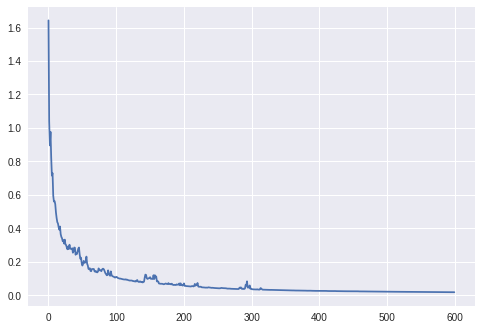

In [19]:
plt.plot(l)
plt.show()

In [20]:
def getAccuracy(X,Y,model):
    outputs = model.predict(X)
    acc = np.sum(outputs==Y)/Y.shape[0]
    return acc

print("Train Acc %.4f"%getAccuracy(X,Y,model))
print("Test Acc %.4f"%getAccuracy(XTest,YTest,model))

Train Acc 0.9944
Test Acc 0.6629


In [21]:
from sklearn.metrics import confusion_matrix
